When we want to explore a new dataset by quickly creating visualizations, using matplotlib and pyplot directly can be cumbersome. Thankfully, pandas has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.
We'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- *Do students in more popular majors make more money?*

**Using scatter plots**

- *How many majors are predominantly male? Predominantly female?*

**Using histograms**

- *Which category of majors have the most students?*

**Using bar plots**

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('../Dataset/recent-grads.csv', encoding = 'UTF-8')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


The above output shows that the top 5 rankings from the `major_category` are engineering majors. 

In [4]:
recent_grads.describe(include = 'all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,COUNSELING PSYCHOLOGY,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


Above we observe that some rows have missing values in one of its columns, eg `Total`, `Men`, `Women` and `ShareWomen` columns. We'll be dropping these rows as matplotlib expects that columns of values we pass in to have matching lengths and missing values will cause matplotlib to throw errors.

In [5]:
# remove all Missing rows
recent_grads = recent_grads.dropna()
recent_grads.count()

Rank                    172
Major_code              172
Major                   172
Total                   172
Men                     172
Women                   172
Major_category          172
ShareWomen              172
Sample_size             172
Employed                172
Full_time               172
Part_time               172
Full_time_year_round    172
Unemployed              172
Unemployment_rate       172
Median                  172
P25th                   172
P75th                   172
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           172
dtype: int64

In [6]:
recent_grads.notnull().count()

Rank                    172
Major_code              172
Major                   172
Total                   172
Men                     172
Women                   172
Major_category          172
ShareWomen              172
Sample_size             172
Employed                172
Full_time               172
Part_time               172
Full_time_year_round    172
Unemployed              172
Unemployment_rate       172
Median                  172
P25th                   172
P75th                   172
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           172
dtype: int64

Above we see that non null values in the dataset are removed, as all columns correspond to having 172 rows each

### Answering some questions using Plots

We'll attempt to answer the following questions using visualizations.

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

In order to answer the question if students in more popular majors make more money, we'll be working with the `Total` and `Median` columns. This is because, the `Total` column shows the total number of graduates with a major and is thus a good indices for measuring popular majors, where unpopular majors are expected to have smaller total number of graduates while popular majors are expected to have larger total number of students.

The `Median` column shows the median salary of full-time, year-round workers. This is also a good indices to measure the amount of money made graduates from each major, as higher median values shows higher salaries while lower median values depict lower salaries.

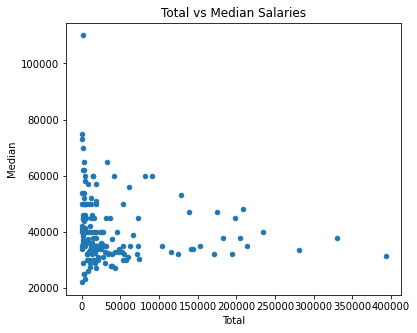

In [7]:
recent_grads.plot(x = 'Total', y = 'Median', kind = 'scatter', figsize = (6, 5), title = 'Total vs Median Salaries')
plt.show()


Above we see that NO relationship exists betweeen `Median` salaries and `Total` number of people with major. We also notice that majority of the median salaries values are contained between 20000 to 78000, while majority of the `Total` spread out between 0 to 230000. From the output in the summary statistics above, we notice that the minimum values for the `Median` and `Total` columns is 22000 and 124 respectively, this gives us the data limits for the constrained plot.

Lets constrain our scatter plot to show values between these ranges we noted above

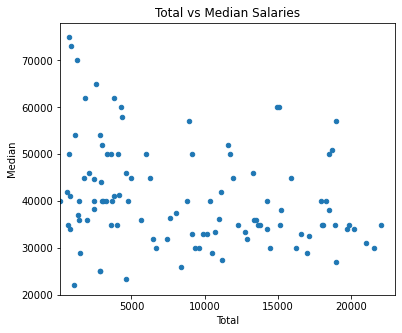

In [8]:
recent_grads.plot(x = 'Total', y = 'Median', figsize = (6, 5), title = 'Total vs Median Salaries',
                  xlim = (120, 23000),
                  ylim = (20000, 78000),
                  kind = 'scatter')
plt.show()

### Answering the question: Do students in more popular majors make more money?

Above we see a clearer spread of median salaries which clusters more between 30000 and 60000, but the total variable is more spread out accross its values ranges. The pattern of the scatter plot above depicts an overall **Negative relationship** between the popular majors and median salaries.

Thus, in general, the more popular a major is the lower is the salary. An explanation for this could be that, more popular majors are saturated with top skilled professionals, therefore attracting a very high salary in such majors is not readily feasible. 

In fact, the highest median salary is earned by a major with less than 3000 people in total. Also the least median salary is earned by a major with less 3000 people in Total.

The least median salary of majors >= 10000 people is around 26000, while the highest for this same group is around 60000 Thus, we can conclude that one of the benefits of taking a popular major is that salaries won't fall too low or range too high either.

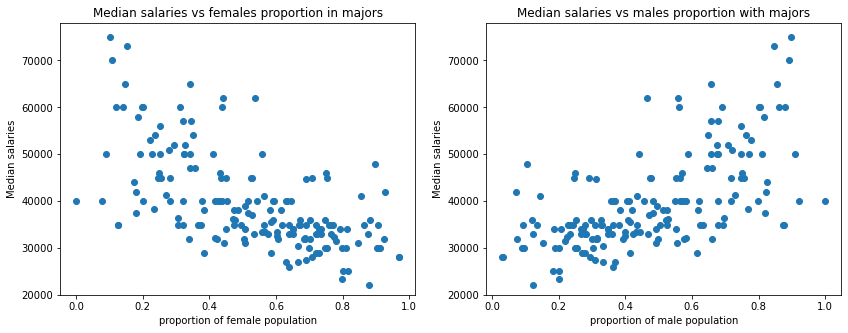

In [9]:
fig = plt.figure(figsize = (14, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

more_men = 1 - recent_grads['ShareWomen'] # Get the male proportion

ax1.scatter(recent_grads['ShareWomen'], recent_grads['Median'])
ax1.set_ylim(20000, 78000)
ax1.set_title('Median salaries vs females proportion in majors')
ax1.set_xlabel('proportion of female population')
ax1.set_ylabel('Median salaries')

ax2.scatter(more_men, recent_grads['Median'])
ax2.set_ylim(20000, 78000)
ax2.set_title('Median salaries vs males proportion with majors')
ax2.set_xlabel('proportion of male population')
ax2.set_ylabel('Median salaries')


plt.show()

### Answering the question: Do students that majored in subjects that were majority female make more money?

The first chart shows that there is an overall strong negative relationship between Median salaries and the proportion of females with majors. It is evident that as the propotion of females with majors increases, the median salaries falls considerably, suggesting that students who majored in subjects where the majority is famales, earn lesser than those who major in subjects where males are majority.

The second chart shows a rather strong positive relationship between Median salaries and proportion of males population with majors. As the proportion of males increases, the median salaries increases also. Thus, majors with more males tend to earn higher salaries than majors with more females.

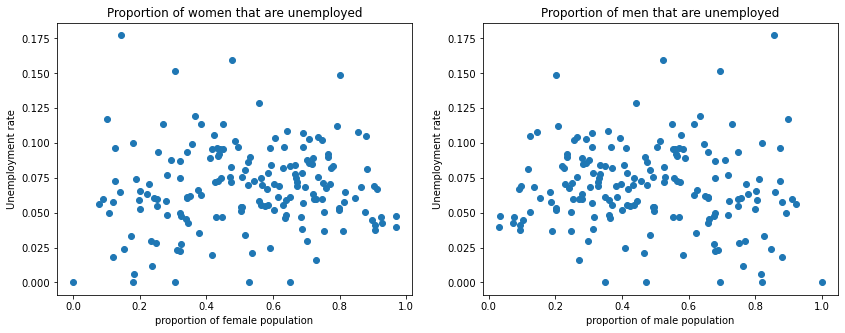

In [10]:
fig = plt.figure(figsize = (14, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

more_men = 1 - recent_grads['ShareWomen'] # Get the male proportion

ax1.scatter(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'])
ax1.set_title('Proportion of women that are unemployed')
ax1.set_xlabel('proportion of female population')
ax1.set_ylabel('Unemployment rate')

ax2.scatter(more_men, recent_grads['Unemployment_rate'])
ax2.set_title('Proportion of men that are unemployed')
ax2.set_xlabel('proportion of male population')
ax2.set_ylabel('Unemployment rate')


plt.show()

From the above outputs, we found in charts that there is no relationship between the proportion of females/male in majors and unemployment rates. In other words, majors with more women did not experience a different rate of unemployment from majors with less women.

Therefore, we can conclude that the unemployment rate in majors, has nothing to do with gender of student.

In [11]:
#Get the maximum and minimum values in Full_time column since the describe output didn't include it
print(recent_grads['Full_time'].min())
print(recent_grads['Full_time'].max())

111
251540


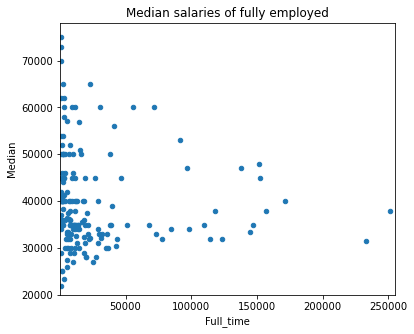

In [12]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter',
                 title = 'Median salaries of fully employed',
                 xlim = (111, 255000),
                 ylim = (20000, 78000),
                 figsize = (6,5))
plt.show()

### Answering the Question: Is there any link between the number of full-time employees and median salary?

The above scatter plot shows that there is no relationship between the number of graduates working full time and median salaries.
In fact, majors with fewer number of graduates working full time, earn more than majors with larger number of graduates working full time.
We can constrain the chart a little more to contain at most 160000 graduates working full time, in order to search for hidden relationships.

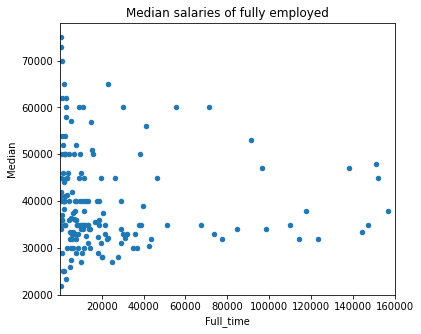

In [13]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter',
                 title = 'Median salaries of fully employed',
                 xlim = (111, 160000),
                 ylim = (20000, 78000),
                 figsize = (6,5))
plt.show()

From the above chart, we find that salaries of full time workers is concentrated between ~25000 and ~60000, we also found that no relationship exists between median salaries and fully employed workers.  Rather we discover that majors with fewer full time workers earn more than majors with a larger population of full time workers. 

Majors with full time workers less than 40000 have a wider spread of Median salaries, ranging between 22000 to 78000, while majors with full time workers greater 40000 have a smaller spread of Median salaries, ranging from 30000 to 60000

### Visualizing Columns

We'll be visualizing columns from the dataset using histograms to generate the distribution of values in the columns. We'll be using different bins and ranges in line with the minimum and maximum values in the columns. The histograms generated will be used to answer the following questions:

- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?

We'll use the `Series.hist()` function instead of `Series.plot()`, because with the former, we can control the binning strategy of a histogram and it which contains parameters specific to customizing histograms 

In [14]:
#Exploring the sample size column
sample_size = recent_grads['Sample_size'].value_counts()
sample_size.sort_index()

2       1
3       2
4       3
5       2
7       3
       ..
2394    1
2554    1
2584    1
2684    1
4212    1
Name: Sample_size, Length: 147, dtype: int64

Above, we notice that the sample size column has 147 unique values, with the least being 2 and the highest being 4212. The data gap between the last value and the preceeding value is large, thus, we'll truncate the last value from our chart so that we can get a better visualization.

We'll use this information to genrate a histogram for the sanple size column.

### Generating Histogram for `sample size column`

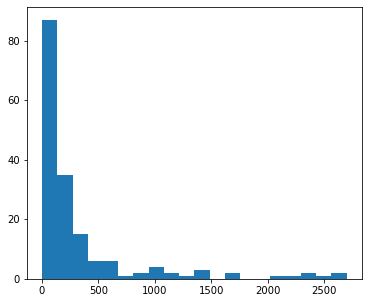

In [15]:
fig = plt.figure(figsize = (6, 5))
ax = recent_grads['Sample_size'].hist(bins = 20, range = (2, 2700), grid = False) # each bin has a length of 135
plt.show()

Over 70% of the sample sizes is below the range of 500, therefore, we'll show values that range from 2 to 500.

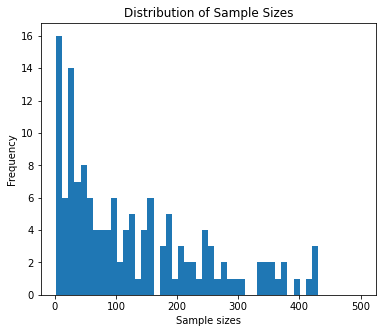

In [16]:
fig = plt.figure(figsize = (6, 5))
ax = recent_grads['Sample_size'].hist(bins = 50, range = (2, 500), grid = False) # each bin has a length of 10
ax.set_title('Distribution of Sample Sizes')
ax.set_xlabel('Sample sizes')
ax.set_ylabel('Frequency')
plt.show()

The Above output shows that over 50% of sample sizes falls within the range of 2 to 200, that is, majority of the samples sizes drawn from the different majors are not more than 200.

We can conclude that over 80% of the samples sizes extracted from the majors and used in the dataset are less than 400.

### Generating Histogram for `Median` column

first lets see the frequency of values in the `Median` Column:

In [17]:
median = recent_grads['Median'].value_counts()
median.sort_index()

22000      1
23400      1
25000      2
26000      1
27000      2
27500      1
28000      3
29000      4
30000      8
30500      1
31000      3
31500      1
32000      8
32100      1
32200      1
32400      1
32500      1
33000      9
33400      1
33500      2
34000      8
35000     20
35600      1
36000      6
36200      1
36400      1
37000      1
37400      1
37500      1
38000      5
38400      1
39000      1
40000     17
40100      1
41000      2
41300      1
42000      2
44000      1
44700      1
45000      9
46000      3
47000      2
48000      1
50000      9
51000      1
52000      2
53000      1
54000      2
56000      1
57000      1
57100      1
58000      1
60000      6
62000      2
65000      2
70000      1
73000      1
75000      1
110000     1
Name: Median, dtype: int64

Above, we see that the values range a 22000 to 110000, and the difference between the last value and the preceeding value is much. Hence, we'll exclude the last value from our chart, in order to get a better visual distribution.

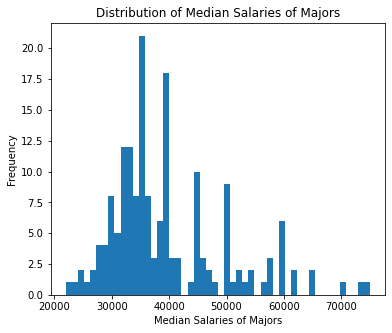

In [18]:
fig = plt.figure(figsize = (6, 5))
ax = recent_grads['Median'].hist(bins = 50, range = (22000, 75000), grid = False) # each bin has a length of 1500
ax.set_title('Distribution of Median Salaries of Majors')
ax.set_xlabel('Median Salaries of Majors')
ax.set_ylabel('Frequency')
plt.show()

### Answering the question: What's the most common median salary range?

The above output shows that Majority of median salaries of majors is within the range of 30000 to 40000.

###### Let's explore the `employed` column a bit

In [19]:
employed = recent_grads['Employed'].value_counts()
employed.sort_index()

0         1
559       1
604       1
613       1
640       1
         ..
180903    1
182295    1
190183    1
276234    1
307933    1
Name: Employed, Length: 170, dtype: int64

The number of employed graduates for each major, ranges from 0 to 307933. The distance between the first value and the second is large, and since it holds just one data point, we'll exclude it in oreder to get a more representative diagram.

### Generating Histogram for `Employed` Graduates

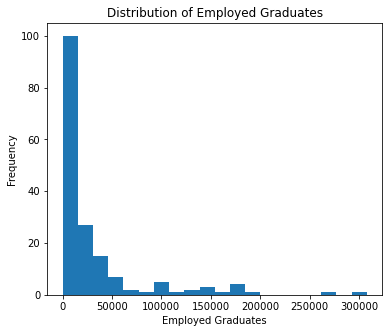

In [20]:
fig = plt.figure(figsize = (6, 5))
ax = recent_grads['Employed'].hist(bins = 20, range = (1, 308000), grid = False) 
ax.set_title('Distribution of Employed Graduates')
ax.set_xlabel('Employed Graduates')
ax.set_ylabel('Frequency')
plt.show()

The Above chart shows the distribution of employed graduates in the majors. About 70% of employed graduates fall within the range of 1 to 50000. In other words, majors with less than 50000 employed graduates make up most of our dataset.

In [21]:
full_time = recent_grads['Full_time'].value_counts()
full_time.sort_index()

111       1
488       1
524       1
556       1
558       1
         ..
151967    1
156668    1
171385    1
233205    1
251540    1
Name: Full_time, Length: 172, dtype: int64

All the values in this column are unique and we can say that they are evenly distributed.

### Generating Histogram for `Full_time` Employed Graduates

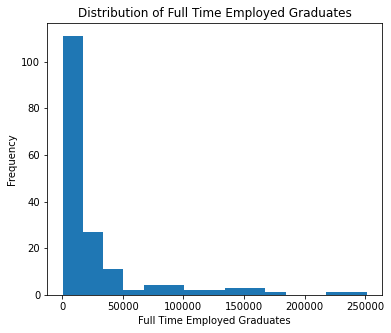

In [22]:
fig = plt.figure(figsize = (6, 5))
ax = recent_grads['Full_time'].hist(bins = 15, range = (111, 251540), grid = False) 
ax.set_title('Distribution of Full Time Employed Graduates')
ax.set_xlabel('Full Time Employed Graduates')
ax.set_ylabel('Frequency')
plt.show()

The above chart also shows that about 70% of full time employed graduates fall within the range of 1 to 50000. In other words, majors with less than 50000 employed graduates make up the majority of our dataset.

In [23]:
share_women = recent_grads['ShareWomen'].value_counts()
share_women.sort_index()

0.000000    1
0.077453    1
0.090713    1
0.101852    1
0.107313    1
           ..
0.910933    1
0.923745    1
0.927807    1
0.967998    1
0.968954    1
Name: ShareWomen, Length: 172, dtype: int64

All the values in this column are unique and we can say that they are evenly distributed

### Generating Histogram for `ShareWomen` column

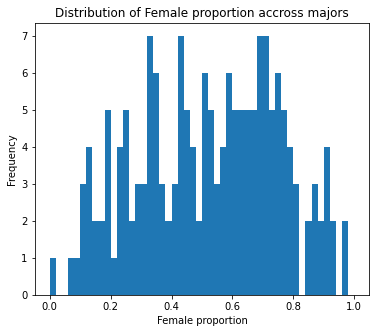

In [24]:
fig = plt.figure(figsize = (6, 5))
ax = recent_grads['ShareWomen'].hist(bins = 50, range = (0, 1), grid = False) 
ax.set_title('Distribution of Female proportion accross majors')
ax.set_xlabel('Female proportion')
ax.set_ylabel('Frequency')
plt.show()

The above histogram shows that the distribution of females in the majors is even and most majors have a females within the proportion of 0.2 to 0.8. Majority of the majors have higher female proportions.

###### Lets get the distribution of unemployment rate 

In [25]:
unemployment_rate = recent_grads['Unemployment_rate'].value_counts()
unemployment_rate.sort_index()

0.000000    5
0.006334    1
0.011690    1
0.016203    1
0.018381    1
           ..
0.128426    1
0.149048    1
0.151850    1
0.159491    1
0.177226    1
Name: Unemployment_rate, Length: 168, dtype: int64

Values in the `unemployment_rate` column are evenly distributed. and ranges from 0 to 0.178

### Generating Histogram for `Unemployment_rate`

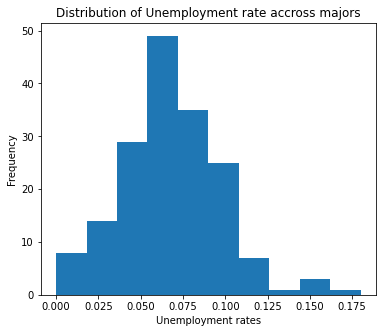

In [26]:
ax = recent_grads['Unemployment_rate'].hist(range = (0, 0.18), figsize = (6, 5), grid = False) 
ax.set_title('Distribution of Unemployment rate accross majors')
ax.set_xlabel('Unemployment rates')
ax.set_ylabel('Frequency')
plt.show()

The above output shows that over 80% of unemployment rate ranges from 0 to 0.1, and the unemployment rate peaked between 0.05 and 0.075., while just a very few majors have unemployment rates greater than 12.5%

###### Lets get the distribution of Men's population

In [27]:
males = recent_grads['Men'].value_counts()
males.sort_index()

119.0       1
124.0       1
134.0       1
280.0       1
404.0       1
           ..
99743.0     1
111762.0    1
115030.0    1
132238.0    1
173809.0    1
Name: Men, Length: 172, dtype: int64

Values in the `Men` column are not evenly distributed but ranges from 119 to 173809. The difference between the last value and the preceeding value is large and we'll exclude the last value from the plot.

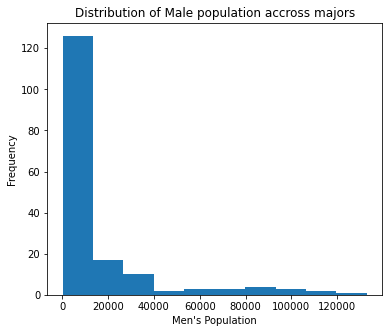

In [28]:
ax = recent_grads['Men'].hist(bins = 10, range = (119, 133000), figsize = (6, 5), grid = False) 
ax.set_title('Distribution of Male population accross majors')
ax.set_xlabel("Men's Population")
ax.set_ylabel('Frequency')
plt.show()

### Answering the question: What percent of majors are predominantly male?

The above histogram shows that 50% of men's population accross all majors in the dataset fall within the range of 0 to 25000

###### Lets get the distribution of Women's population

In [29]:
females = recent_grads['Women'].value_counts()
females.sort_index()

0.0         1
77.0        1
109.0       1
131.0       1
135.0       1
           ..
156118.0    1
157833.0    1
168947.0    1
187621.0    1
307087.0    1
Name: Women, Length: 171, dtype: int64

Values in the Women column are also not evenly distributed and ranges from 0 to 307087. The difference between the last value and the preceeding value is large and we'll exclude the last value from the plot.

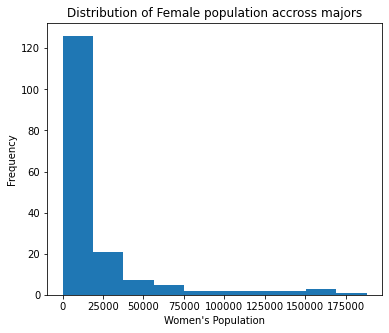

In [30]:
ax = recent_grads['Women'].hist(bins = 10, range = (0, 188000), figsize = (6, 5), grid = False) 
ax.set_title('Distribution of Female population accross majors')
ax.set_xlabel("Women's Population")
ax.set_ylabel('Frequency')
plt.show()

### Answering the question: What percent of majors are predominantly female?

The above histogram shows that 50% of women population accross all majors fall within the range of 0 to 30000. 

###### Visualizing data using the Scatter Matrix plot

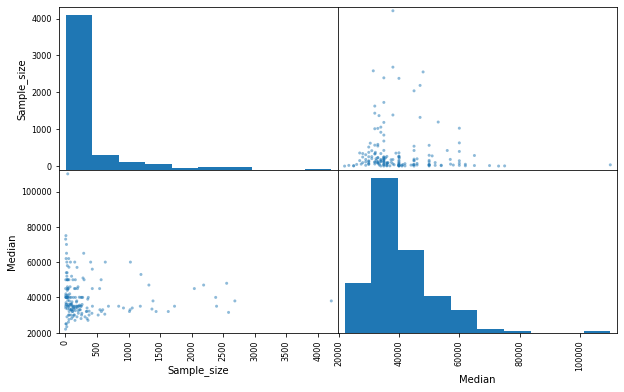

In [31]:
# import the scatter_matrix function from the pandas.plotting module
from pandas.plotting import scatter_matrix

# scatter matrix for sample size and median columns
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10, 6), grid = False)
plt.show()

The above scatter matrix leads to the same interpretation as what we have arrived at before in precceding cells. Summarily, the histogram for sample size shows that most sample sizes are less than 400. While the scatter plot shows that there is no relationship between sample size and median salaries.

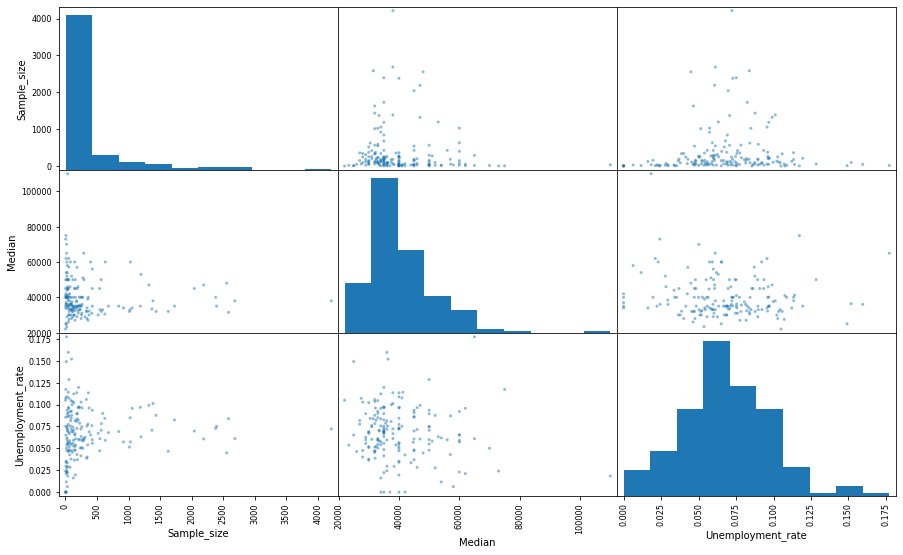

In [32]:
# scatter matrix for sample size, median and unemployment rate columns

scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (15, 9), grid = False, diagonal = 'hist')
plt.show()

Unemployment rate is more spread out accross the range of 0 - 0.125. The dominant unemployment rate accross all majors is within the range 0.05 to 0.1. Majority of the majors experienced unemployment rates within 5% to 10%. Over 60% of median salaries ranged between 20000 to 80000 and most of the major graduates earned between 30000 to 40000 Median salaries. We also notice a weak negative relationship between unemployment rate and median salaries, as the scatter plot shows that unemployment rates declined as Median salaries increased.

##### Visualization using Bar Plots

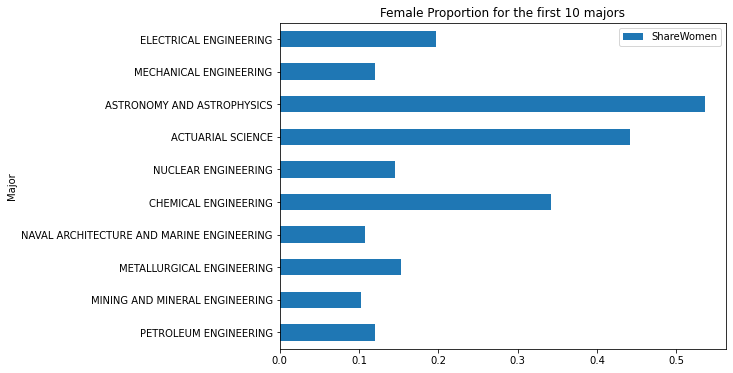

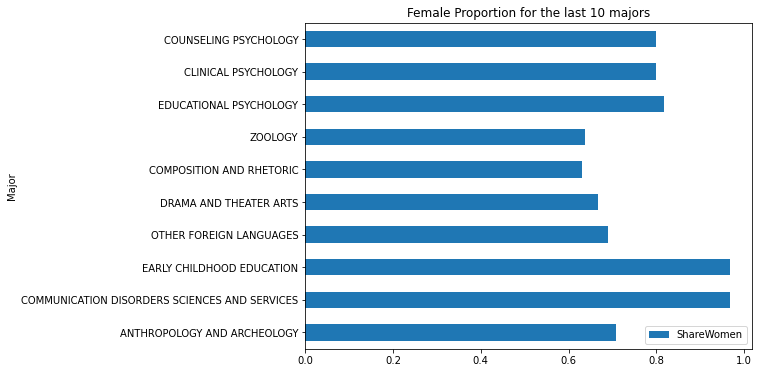

In [33]:
ax = recent_grads[0:10].plot.barh(x = 'Major', y = 'ShareWomen', 
                                  title = 'Female Proportion for the first 10 majors',
                                  figsize = (8, 6))

ax2 = recent_grads[-11:~0].plot.barh(x = 'Major', y = 'ShareWomen',
                                     title = 'Female Proportion for the last 10 majors',
                                     figsize = (8, 6))


plt.show()

The above bar plots show the proportion of women in the first 10 and last 10 majors. We notice that amongst the first 10 majors `Astronomy and Astrophysics` has the greater proportion of women with over 50% of its graduands being women, followed by `Actuarial Science` having about 45% female graduands.

For the last 10 majors in our dataset. We notice that `Early Childhood Education` and `Communication Disorders Sciences and Services` has the greater proportion of women with almost all its graduands being women.

Comparatively, we notice that the last 10 majors has more female graduands that the first 10 majors in our data set, with the least of the last 10 having over 60% female graduands while the least of the first 10 has just about 10% female graduands.

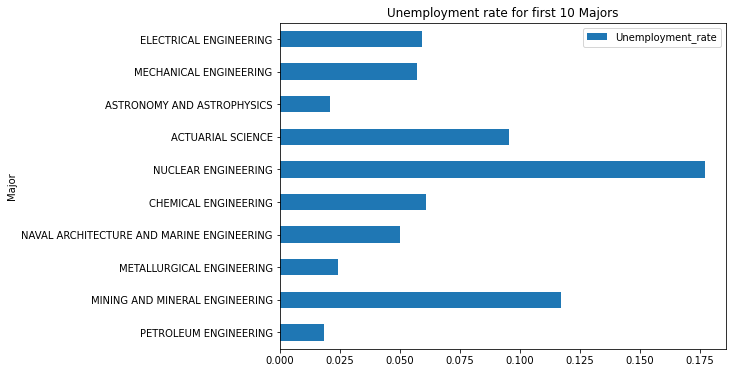

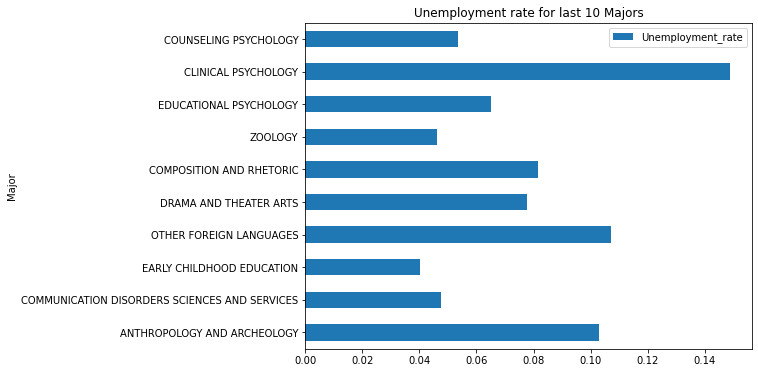

In [34]:
ax3 = recent_grads[0:10].plot.barh(x = 'Major', y = 'Unemployment_rate',
                                   figsize = (8, 6),
                                  title = 'Unemployment rate for first 10 Majors')

ax4 = recent_grads[-11:~0].plot.barh(x = 'Major', y = 'Unemployment_rate', 
                                    figsize = (8, 6),
                                    title = 'Unemployment rate for last 10 Majors')
plt.show()

The bar plots above show the rate of **Unemployment** in the first and last 10 majors. We notice that amongst the first 10 majors `Nuclear Engineering` has the highest rate of **Unemployment** of about 17.5%, followed by `Mining and Mineral Engineering` having about 11.5% unemployment rate. 

For the last 10 majors, We noticed that `Clinical Psychology` has the highest rate of **Unemployment** over 14%, followed by `Other Foreign Languages` having about 11.% unemployment rate.

Comparatively, the last 10 majors has higher rates of unemployment that the first 10, having their leasts at 4% and ~2% respectively.